# Grip21 Jan

# Decision Tree Task 6

# The Spark Foundation

# Name:Muhammad Hassan Khan

# Import Libraries 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Dataset

In [48]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Explanatory Data Analysis

In [49]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
data.apply(lambda x : x.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
data.shape

(150, 6)

In [53]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [54]:
data["Species"].value_counts()


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

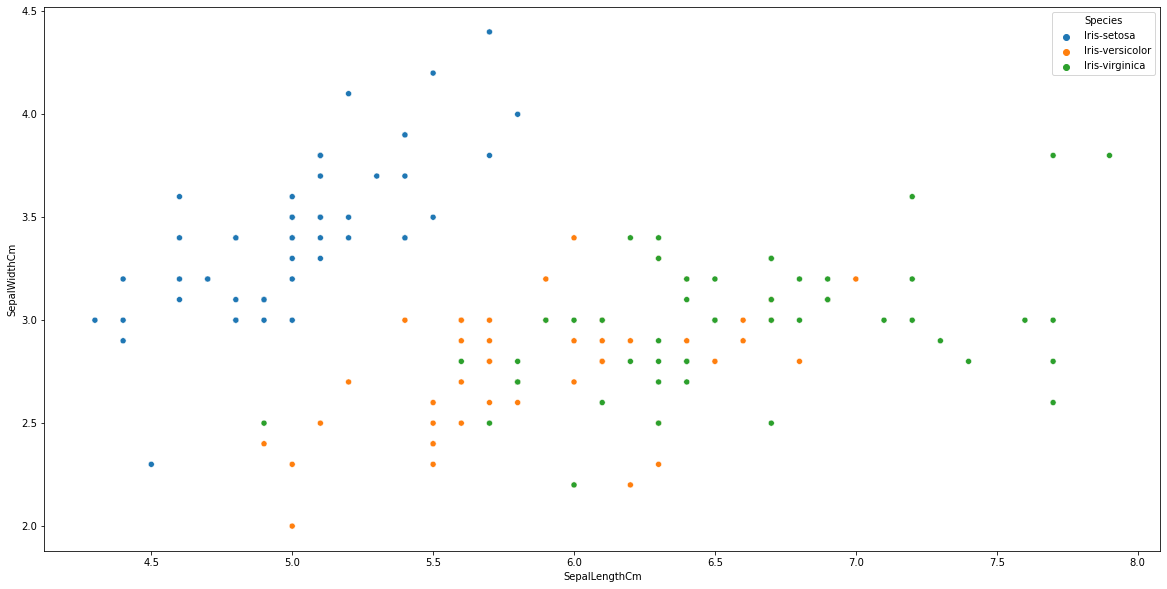

In [55]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data)
plt.show()

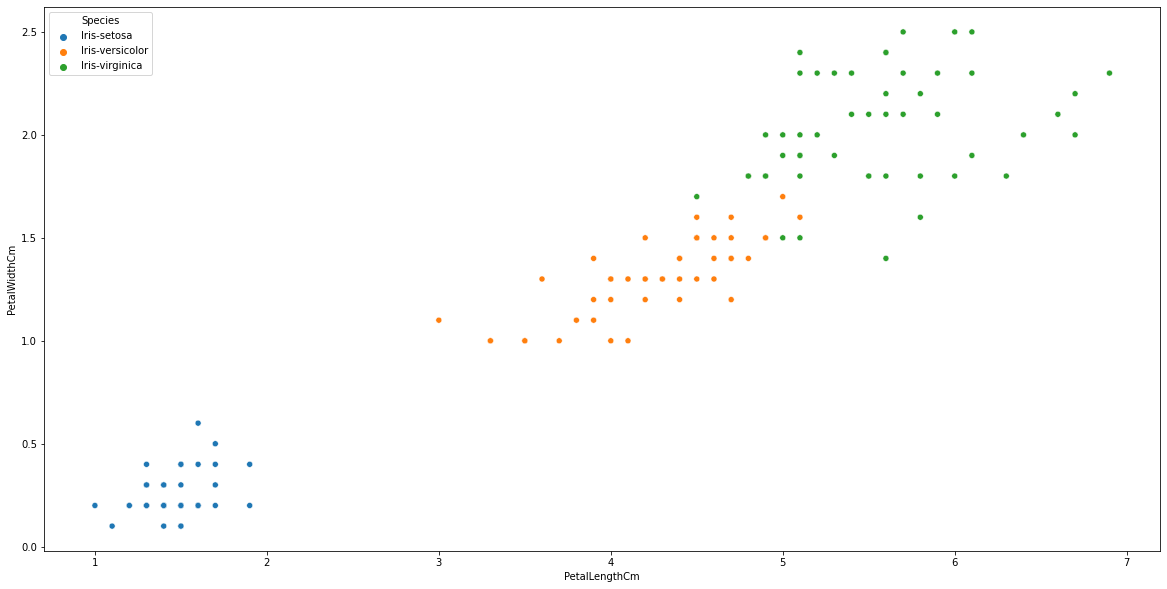

In [56]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=data)
plt.show()

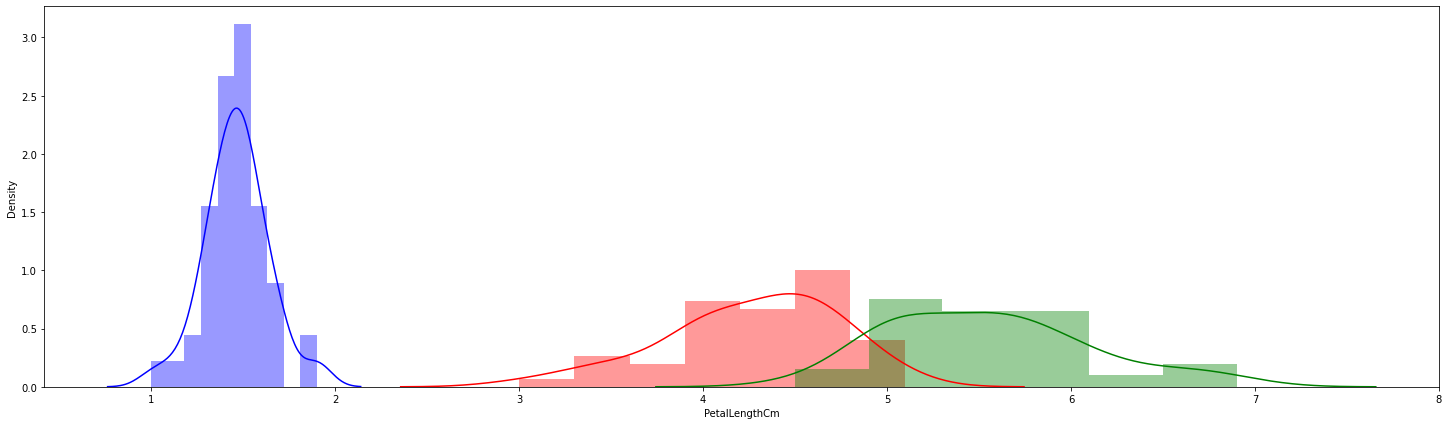

In [57]:
plt.subplots(figsize=(25,7))
sns.distplot(data[data.Species == "Iris-setosa"].PetalLengthCm,color="b")
sns.distplot(data[data.Species == "Iris-versicolor"].PetalLengthCm,color="r")
sns.distplot(data[data.Species == "Iris-virginica"].PetalLengthCm,color="g")
plt.show()

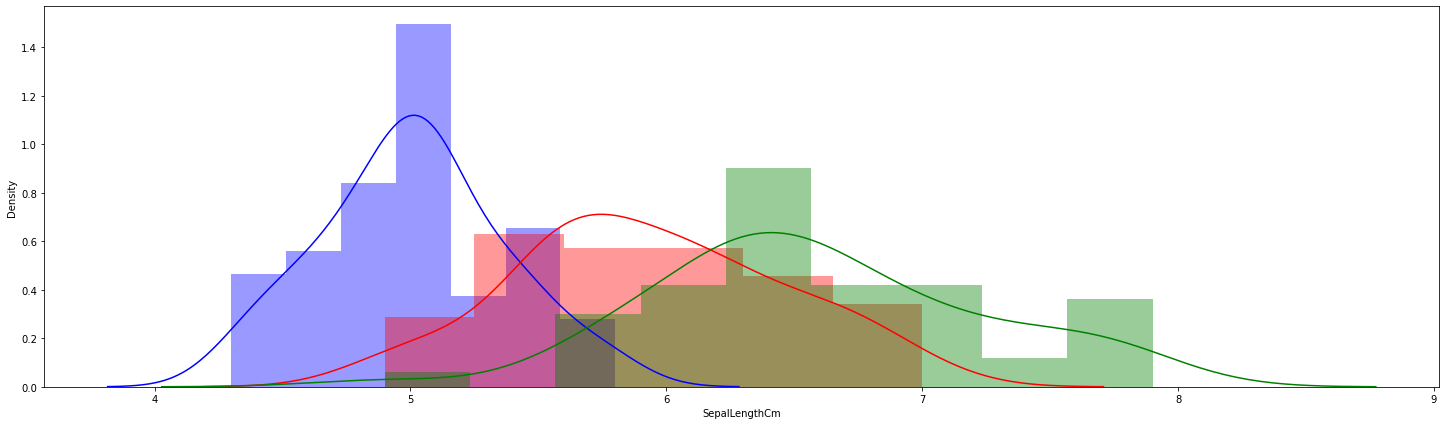

In [58]:
plt.subplots(figsize=(25,7))
sns.distplot(data[data.Species == "Iris-setosa"].SepalLengthCm,color="b")
sns.distplot(data[data.Species == "Iris-versicolor"].SepalLengthCm,color="r")
sns.distplot(data[data.Species == "Iris-virginica"].SepalLengthCm,color="g")
plt.show()

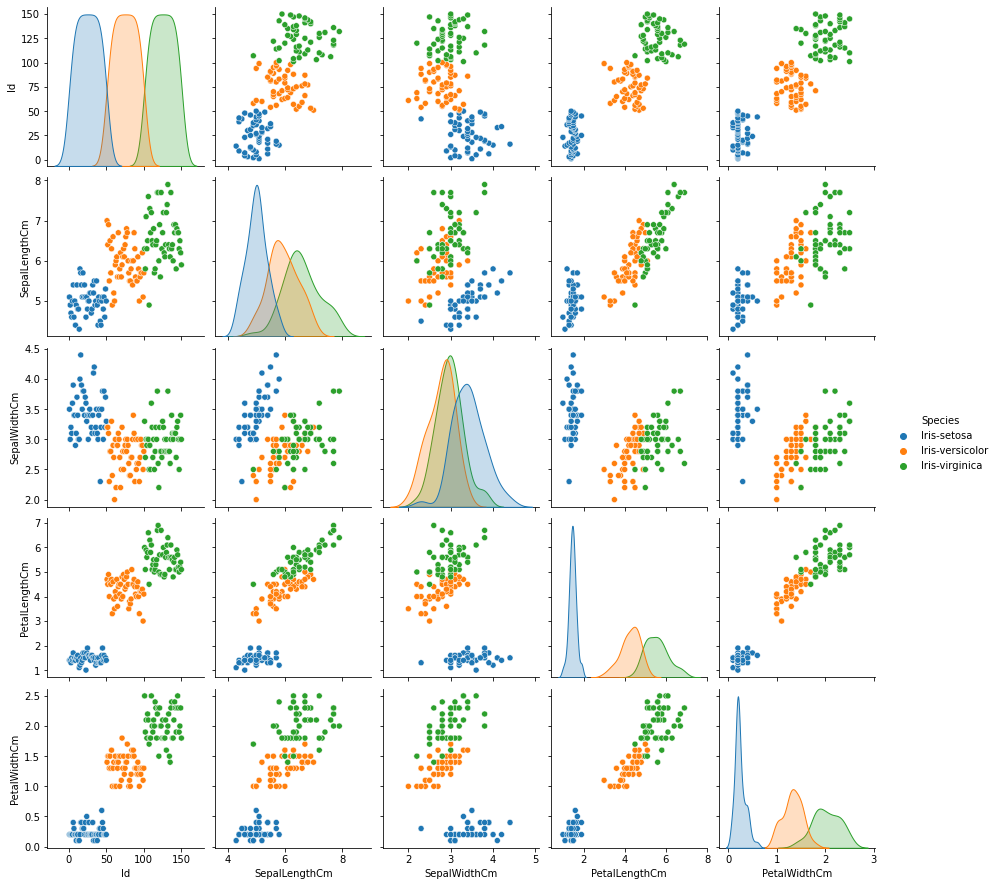

In [59]:
sns.pairplot(data, hue="Species")
plt.show()

# Data Preprocessing

In [60]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Species"]) 
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [61]:
data["Label"].value_counts()

2    50
1    50
0    50
Name: Label, dtype: int64

In [62]:
data.drop(["Species"], axis=1, inplace=True)

In [46]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [63]:
data.drop(["Id"], axis=1, inplace=True)

In [64]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting the Dataset

In [65]:
X, y = data.iloc[: , :-1], data.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


# Create the Model

In [68]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9904761904761905
Accuracy of test: 0.9333333333333333


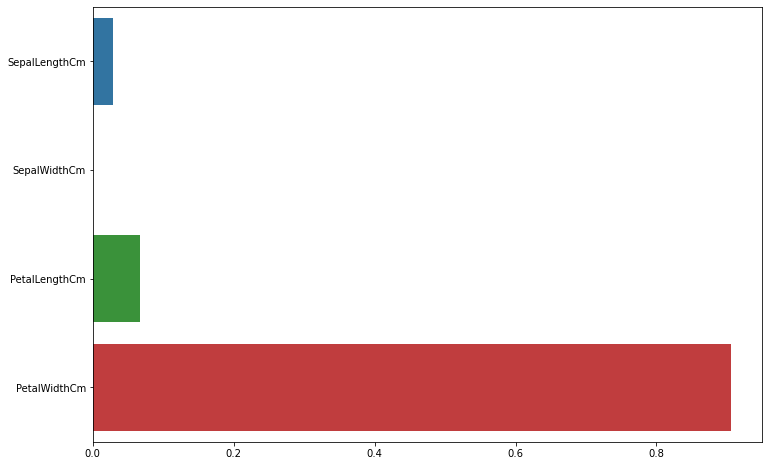

In [78]:
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [79]:
importance


array([0.02840988, 0.        , 0.06639043, 0.90519969])

In [81]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



In [82]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))


Precision = 0.923076923076923
Recall = 0.9411764705882352
Accuracy = 0.9333333333333333
F1 Score = 0.9242636746143057


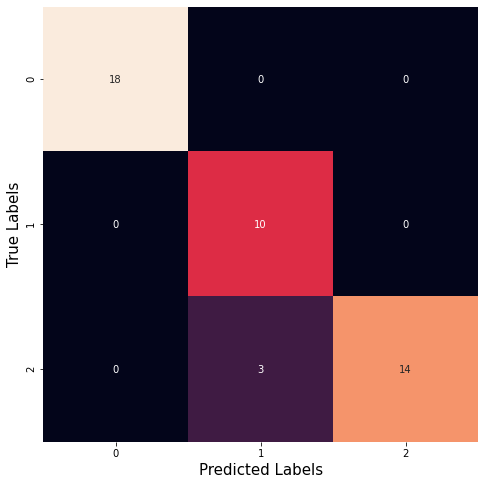

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()